## Background of Problem Statement:
The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.

## Objective :
We need to perform analysis using the Exploratory Data Analysis Technique and also need to find features affecting the ratings of any particular movie.

## Analysis Tasks to be performed:

1. Import the three datasets
2. Create a new dataset [Master_Data] with the following columns MovieID, Title, UserID, Age, Gender, Occupation, Rating. 
3. Explore the datasets using visual representations (graphs or tables), also include comments on the following:
    - User Age Distribution
    - User rating of the movie “Toy Story”
    - Top 25 movies by viewership rating
    - Find the ratings for all the movies reviewed by for a particular user of user id = 2696

## Feature Engineering:
Use column genres:
1. Find out all the unique genres.
2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
3. Determine the features affecting the ratings of any particular movie.

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split

### 1. Import the three datasets

In [121]:
# Create variables for the column names of the respective data frame
rating = ['UserID','MovieID','Rating','Timestamp']
user = ['UserID','Gender','Age','Occupation','Zip-code']
movie = ['MovieID','Title','Genres']

In [123]:
# delimiter separate the fields and names are the variables that we input in above cell
rating_df = pd.read_csv('Data/ratings.dat', header=None, delimiter='::', names= rating, engine='python')
rating_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [37]:
rating_df.shape

(1000209, 4)

In [38]:
rating_df.describe()

,UserID,MovieID,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


In [39]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [40]:
rating_df.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [41]:
# Convert timestamp and get the 'Year' & 'Month'
from datetime import datetime

rating_df['Timestamp'] = rating_df['Timestamp'].apply(datetime.fromtimestamp)
rating_df['Year'] = rating_df['Timestamp'].dt.year
rating_df['Month'] = rating_df['Timestamp'].dt.month

rating_df = rating_df.sort_values('Timestamp').reset_index(drop=True)

In [42]:
rating_df.head() #re-check again to ensure Year and Month are captured in the dataframe

,UserID,MovieID,Rating,Timestamp,Year,Month
0,6040,858,4,2000-04-26 07:05:32,2000,4
1,6040,2384,4,2000-04-26 07:05:54,2000,4
2,6040,593,5,2000-04-26 07:05:54,2000,4
3,6040,1961,4,2000-04-26 07:06:17,2000,4
4,6040,2019,5,2000-04-26 07:06:17,2000,4


In [124]:
movie_df = pd.read_csv('Data/movies.dat',header=None,delimiter='::',names=movie, engine='python',encoding='ISO-8859-1')
movie_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [44]:
movie_df.shape

(3883, 3)

In [45]:
movie_df.describe(include='all')

,MovieID,Title,Genres
count,3883.000000,3883,3883
unique,NaN,3883,301
top,NaN,Toy Story (1995),Drama
freq,NaN,1,843
mean,1986.049446,NaN,NaN
std,1146.778349,NaN,NaN
min,1.000000,NaN,NaN
25%,982.500000,NaN,NaN
50%,2010.000000,NaN,NaN
75%,2980.500000,NaN,NaN


In [46]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [47]:
movie_df.isnull().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [125]:
user_df = pd.read_csv('Data/users.dat', header=None, delimiter='::', names=user, engine='python')
user_df.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [49]:
user_df.shape

(6040, 5)

In [50]:
user_df.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [51]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [52]:
user_df.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [53]:
# Look at all the three df
for df in [rating_df, user_df, movie_df]:
    print(df.head())
    print(df.shape)

   UserID  MovieID  Rating           Timestamp  Year  Month
0    6040      858       4 2000-04-26 07:05:32  2000      4
1    6040     2384       4 2000-04-26 07:05:54  2000      4
2    6040      593       5 2000-04-26 07:05:54  2000      4
3    6040     1961       4 2000-04-26 07:06:17  2000      4
4    6040     2019       5 2000-04-26 07:06:17  2000      4
(1000209, 6)
   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455
(6040, 5)
   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)     

### 2. Create a new dataset [Master_Data] with the following columns:
- MovieID
- Title
- UserID
- Age
- Gender
- Occupation
- Rating

In [54]:
# First Merge
ratinganduser_df = rating_df.merge(user_df, on = 'UserID')
ratinganduser_df.head()

,UserID,MovieID,Rating,Timestamp,Year,Month,Gender,Age,Occupation,Zip-code
0,6040,858,4,2000-04-26 07:05:32,2000,4,M,25,6,11106
1,6040,2384,4,2000-04-26 07:05:54,2000,4,M,25,6,11106
2,6040,593,5,2000-04-26 07:05:54,2000,4,M,25,6,11106
3,6040,1961,4,2000-04-26 07:06:17,2000,4,M,25,6,11106
4,6040,2019,5,2000-04-26 07:06:17,2000,4,M,25,6,11106


In [55]:
# Second Merge
Final_Data = ratinganduser_df.merge(movie_df, on = 'MovieID')
Master_Data = Final_Data[['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', 'Rating']]

Master_Data.shape

(1000209, 7)

In [56]:
Master_Data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,858,"Godfather, The (1972)",6040,25,M,6,4
1,858,"Godfather, The (1972)",6039,45,F,0,4
2,858,"Godfather, The (1972)",6037,45,F,1,5
3,858,"Godfather, The (1972)",6033,50,M,13,4
4,858,"Godfather, The (1972)",6028,18,M,4,4


In [57]:
Master_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   UserID      1000209 non-null  int64 
 3   Age         1000209 non-null  int64 
 4   Gender      1000209 non-null  object
 5   Occupation  1000209 non-null  int64 
 6   Rating      1000209 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 53.4+ MB


In [58]:
Master_Data.describe()

,MovieID,UserID,Age,Occupation,Rating
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,1.865540e+03,3.024512e+03,2.973831e+01,8.036138e+00,3.581564e+00
std,1.096041e+03,1.728413e+03,1.175198e+01,6.531336e+00,1.117102e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,1.030000e+03,1.506000e+03,2.500000e+01,2.000000e+00,3.000000e+00
50%,1.835000e+03,3.070000e+03,2.500000e+01,7.000000e+00,4.000000e+00
75%,2.770000e+03,4.476000e+03,3.500000e+01,1.400000e+01,4.000000e+00
max,3.952000e+03,6.040000e+03,5.600000e+01,2.000000e+01,5.000000e+00


In [59]:
Master_Data.isnull().sum()/len(Master_Data)

MovieID       0.0
Title         0.0
UserID        0.0
Age           0.0
Gender        0.0
Occupation    0.0
Rating        0.0
dtype: float64

In [60]:
corr = Master_Data.corr(numeric_only=True)

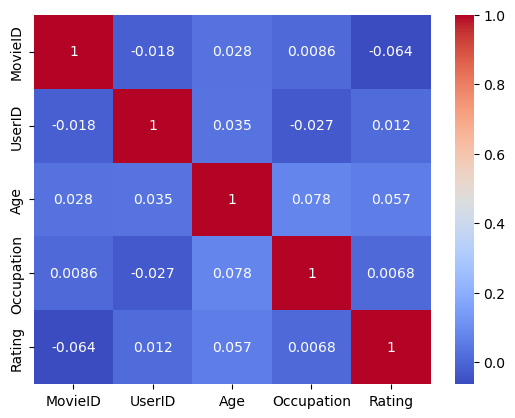

In [61]:
import seaborn as sns
sns.heatmap(corr, annot=True, cmap ='coolwarm');

In [63]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.3 requires pydantic<2.0, but you have pydantic 2.7.1 which is incompatible.


  Obtaining dependency information for ydata-profiling from https://files.pythonhosted.org/packages/49/03/04ce11264d78f7a9f1025a13f8a078aa18eb2a9c628bc0a9a9c18673062c/ydata_profiling-4.7.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pydantic>=2 from https://files.pythonhosted.org/packages/ed/76/9a17032880ed27f2dbd490c77a3431cbc80f47ba81534131de3c2846e736/pydantic-2.7.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/107.3 kB ? eta -:--:--
     -------------------------------------- 107.3/107.3 kB 3.0 MB/s eta 0:00:00
  Obtaining dependency information for visions[type_image_path]<0.7.7,>=0.7.5 from https://files.pythonhosted.org/packages/7c/bf/612b24e711ae25dea9af19b9304634b8949faa0b035fad47e8bcadf62f59/visions-0.7.6-py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for phik<0.13,>=0.11.1 from https://files.pythonhosted.or

In [64]:
# We can also use profiling to generate the report
import pandas_profiling
pandas_profiling.ProfileReport(Master_Data)

C:\Users\davel\AppData\Local\Temp\ipykernel_36072\4218837442.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 3. Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
- User Age Distribution
- User rating of the movie “Toy Story”
- Top 25 movies by viewership rating
- Find the ratings for all the movies reviewed by for a particular user of user id = 2696


In [65]:
# Explore the rating dataset
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   UserID     1000209 non-null  int64         
 1   MovieID    1000209 non-null  int64         
 2   Rating     1000209 non-null  int64         
 3   Timestamp  1000209 non-null  datetime64[ns]
 4   Year       1000209 non-null  int32         
 5   Month      1000209 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(3)
memory usage: 38.2 MB


In [66]:
rating_df.shape

(1000209, 6)

#### Rating datasets have more than 1 million of rows and timestamp (data type) is integer.

In [67]:
rating_df.head()

,UserID,MovieID,Rating,Timestamp,Year,Month
0,6040,858,4,2000-04-26 07:05:32,2000,4
1,6040,2384,4,2000-04-26 07:05:54,2000,4
2,6040,593,5,2000-04-26 07:05:54,2000,4
3,6040,1961,4,2000-04-26 07:06:17,2000,4
4,6040,2019,5,2000-04-26 07:06:17,2000,4


In [68]:
# Explore the unique years, users and movies for our better understanding of the rating dataset

print(f"Identify the Unique Years:",rating_df.Year.unique())
print(f"Number of Unique Users:", rating_df.UserID.nunique())
print(f"Number of Unique Movies:", rating_df.MovieID.nunique())

Identify the Unique Years: [2000 2001 2002 2003]
Number of Unique Users: 6040
Number of Unique Movies: 3706


In [69]:
# Interested to know which year has the highest rating
ratings_per_year = rating_df[['Year','Rating']].groupby(['Year']).count().reset_index()

In [70]:
ratings_per_year.head()

,Year,Rating
0,2000,904082
1,2001,68691
2,2002,24083
3,2003,3353


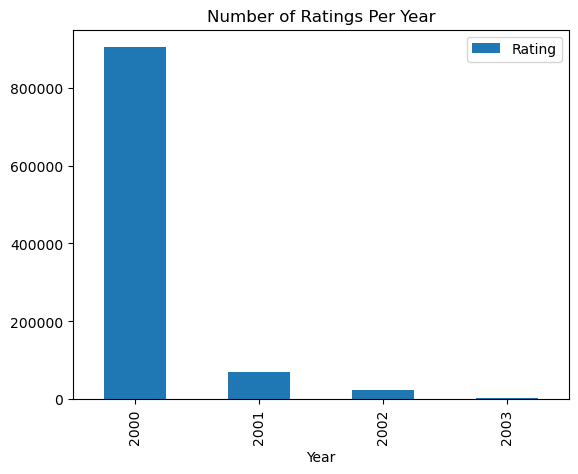

In [71]:
# Plot for visualization
ratings_per_year.plot.bar(x='Year',y='Rating',title ='Number of Ratings Per Year');

#### Year 2000 has the highest number of ratings in the datasets.

In [72]:
rating_df['UserID'].value_counts()

UserID
4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
        ... 
5215      20
3530      20
1844      20
5314      20
5525      20
Name: count, Length: 6040, dtype: int64

#### UserID 4169 is the top user with 2314 ratings.

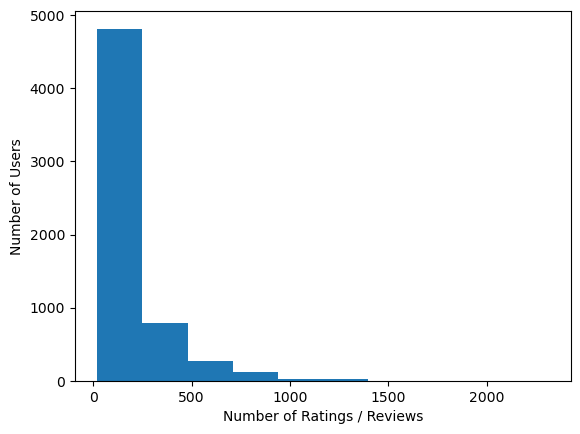

In [73]:
# Count the number of ratings rated by each user
user_rating_counts = rating_df['UserID'].value_counts()

plt.hist(user_rating_counts)
plt.xlabel('Number of Ratings / Reviews')
plt.ylabel('Number of Users')
plt.show()

#### Most of the users gave a total of ratings or reviews from 1 to 250 followed by around 900 users gave approximately 250 to 450 number of ratings or reviews.

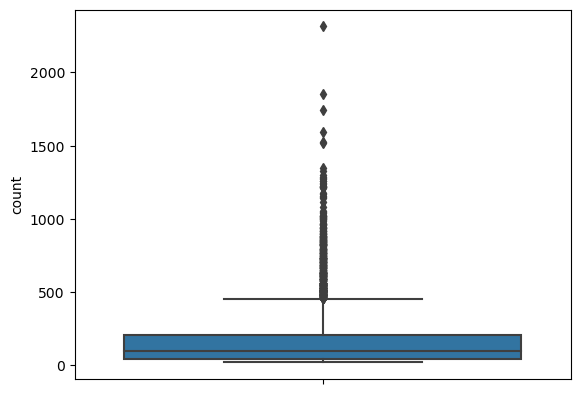

In [74]:
sns.boxplot(data = rating_df, y=rating_df['UserID'].value_counts())
plt.show()

In [75]:
# Maximum number of movies rated by a single user
movies_rated = rating_df.groupby("UserID").size().sort_values(ascending=False)
print(f"Max movies rated by one user: {max(movies_rated)}")
print(f"Min movies rated by one user: {min(movies_rated)}")

Max movies rated by one user: 2314
Min movies rated by one user: 20


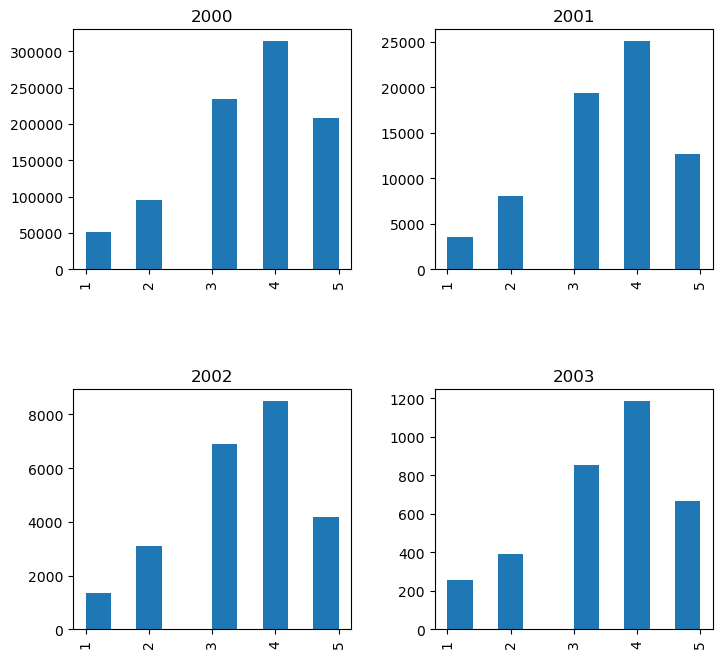

In [76]:
# Explore the distribution for the different years
rating_df.hist(column='Rating',by='Year', figsize=(8,8))
plt.show()

#### We can see that the most common rating is 4 for all the years.

In [77]:
# Explore the user dataset
user_df.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [78]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


#### There is a total of 6040 users.

In [79]:
# Find the number of unique occupation
print(f"Number of Unique Occupation:", user_df.Occupation.nunique())

Number of Unique Occupation: 21


In [80]:
user_df.Occupation.value_counts().head(3)

Occupation
4    759
0    711
7    679
Name: count, dtype: int64

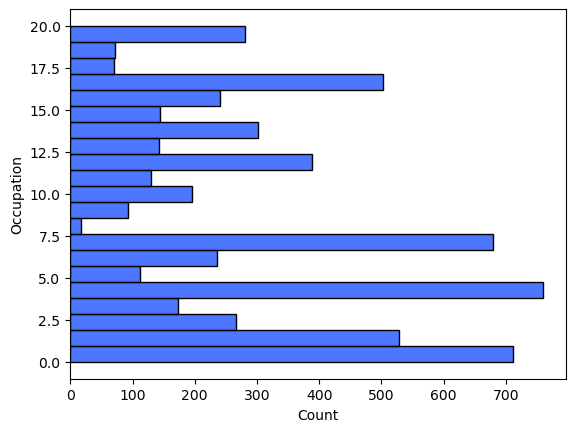

In [81]:
sns.set_palette("bright")
sns.histplot(data=user_df, y='Occupation', bins=21, alpha = 0.7)
plt.show()

#### Top 3 Occupation group are:
1. (4) - College / grad student
2. (0) - other or not specified
3. (7) - executive / managerial

In [82]:
gender_counts = user_df.Gender.value_counts()
gender_counts

Gender
M    4331
F    1709
Name: count, dtype: int64

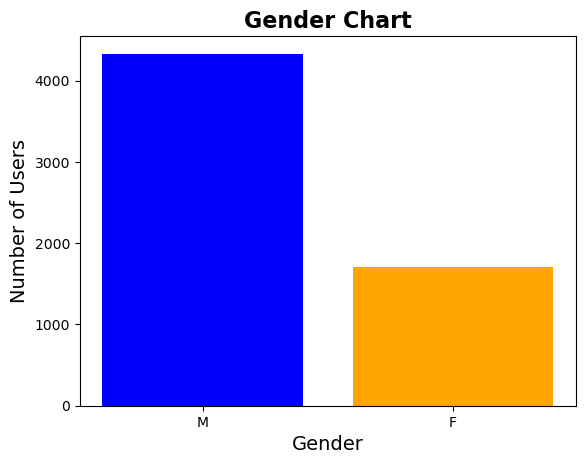

In [83]:
# Plot the Gender
plt.bar(x = gender_counts.index[0], height=gender_counts.values[0], color="Blue")
plt.bar(x = gender_counts.index[1], height=gender_counts.values[1], color="orange")
plt.title("Gender Chart", fontsize=16, fontweight = "bold")
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Number of Users", fontsize=14)
plt.show()

#### There are significant more Male users than Female users.

In [84]:
# Find the average rating for each gender
print(round(Master_Data['Rating'].groupby(Master_Data['Gender']).mean(), 2))

Gender
F    3.62
M    3.57
Name: Rating, dtype: float64


#### Female has slightly higher average rating then Male.

In [85]:
# Explore the movie dataset
movie_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [86]:
# Use RE to get the release year and plot it using px library
import re
import plotly.express as px

movie_df['Release Year'] = movie_df['Title'].apply(lambda movie_name: re.search('\((\d{4})\)', movie_name).groups(1)[0])
movie_df_sorted = movie_df.sort_values('Release Year')
movie_count_by_year = px.histogram(movie_df_sorted, x='Release Year', title='Movie count by Release Year')
movie_count_by_year.show()

#### The highest movie counts by release year is 1996 with 345 movies and from 1992 onwards, the movies starts to increase.

In [87]:
# unique genres
genres_unique = pd.DataFrame(movie_df.Genres.str.split('|').tolist()).stack().unique()
print('Unique genres:', genres_unique)
genres_unique = pd.DataFrame(genres_unique, columns=['genre'])

Unique genres: ['Animation' "Children's" 'Comedy' 'Adventure' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Sci-Fi' 'Documentary' 'War'
 'Musical' 'Mystery' 'Film-Noir' 'Western']


In [88]:
genres_unique

,genre
0,Animation
1,Children's
2,Comedy
3,Adventure
4,Fantasy
5,Romance
6,Drama
7,Action
8,Crime
9,Thriller


#### There are a total of 18 unique genres.

### 1. User Age Distribution

In [89]:
age_range = user_df.groupby('Age').size()
age_range

Age
1      222
18    1103
25    2096
35    1193
45     550
50     496
56     380
dtype: int64

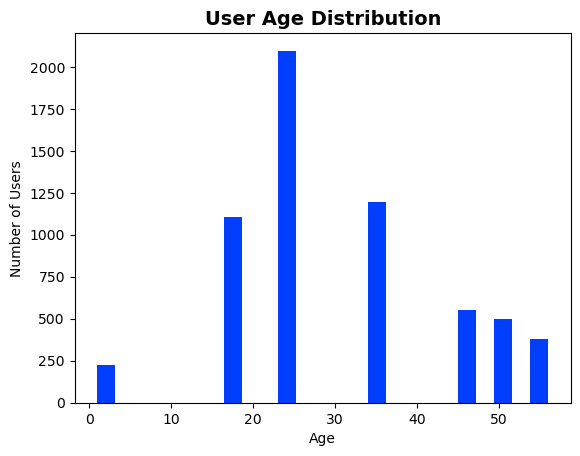

In [90]:
# plot
plt.hist(data=age_range, x=[user_df.Age], bins=25)
plt.title('User Age Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

#### We can see that 25 (range 25 to 34 years old) has the highest user age distribution.

### 2. User rating of the movie “Toy Story”

In [91]:
Master_Data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,858,"Godfather, The (1972)",6040,25,M,6,4
1,858,"Godfather, The (1972)",6039,45,F,0,4
2,858,"Godfather, The (1972)",6037,45,F,1,5
3,858,"Godfather, The (1972)",6033,50,M,13,4
4,858,"Godfather, The (1972)",6028,18,M,4,4


In [92]:
Toy_Story_User_Ratings = Master_Data[Master_Data.Title == 'Toy Story (1995)']
Toy_Story_User_Ratings.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
200524,1,Toy Story (1995),6040,25,M,6,3
200525,1,Toy Story (1995),6035,25,F,1,4
200526,1,Toy Story (1995),6032,45,M,7,4
200527,1,Toy Story (1995),6025,25,F,1,5
200528,1,Toy Story (1995),6022,25,M,17,5


In [93]:
Toy_Story_User_Ratings.groupby('Rating').size()

Rating
1     16
2     61
3    345
4    835
5    820
dtype: int64

In [94]:
# Find the mean of the toy story user rating
Toy_Story_Mean = Toy_Story_User_Ratings['Rating'].mean()
print(f"The average of the rating for Toy Story is {Toy_Story_Mean:.2f}")

The average of the rating for Toy Story is 4.15


In [95]:
Toy_Story_User_Ratings.shape

(2077, 7)

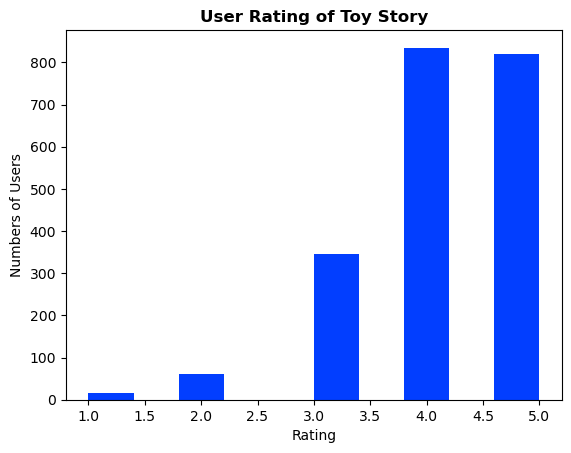

In [96]:
plt.hist(x = Toy_Story_User_Ratings['Rating'])
plt.title('User Rating of Toy Story', fontweight ='bold')
plt.xlabel("Rating")
plt.ylabel("Numbers of Users")
plt.show()

#### Rating for Toy Story movie is mostly in 4 and 5 with average rating of 4.15 and only 16 users rated this movie as 1. Hence, the overall rating is considered good for the movie of Toy Story.

### 3. Top 25 Movies based on viewership ratings

In [97]:
# Top 25 movies by viewership ratings
Master_Data.groupby('Title').size().sort_values(ascending=False)[:25]

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

In [98]:
# Top 25 movies based on the average viewership ratings
Top25_movies = pd.DataFrame(Master_Data.groupby('Title')['Rating'].agg('mean')).sort_values(by="Rating", ascending=False).head(25)
Top25_movies['Title'] = Top25_movies.index
Top25_movies.index = range(1,26)
Top25_movies[['Title','Rating']]

,Title,Rating
1,Ulysses (Ulisse) (1954),5.000000
2,Lured (1947),5.000000
3,Follow the Bitch (1998),5.000000
4,Bittersweet Motel (2000),5.000000
5,Song of Freedom (1936),5.000000
6,One Little Indian (1973),5.000000
7,Smashing Time (1967),5.000000
8,Schlafes Bruder (Brother of Sleep) (1995),5.000000
9,"Gate of Heavenly Peace, The (1995)",5.000000
10,"Baby, The (1973)",5.000000


#### There are a total of 10 movies rated 5 in the top 25 average viewership ratings.

### 4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [99]:
# Create a variable and filter by userID 2696
UserID_2696 = Master_Data[Master_Data['UserID']== 2696]

# Sort it by the ratings and get the columns that we are interested in
UserID_2696 = UserID_2696.sort_values('Rating', ascending=False, ignore_index=True) 
UserID_2696[['UserID', 'MovieID', 'Title','Rating']]

,UserID,MovieID,Title,Rating
0,2696,800,Lone Star (1996),5
1,2696,1617,L.A. Confidential (1997),4
2,2696,1092,Basic Instinct (1992),4
3,2696,1892,"Perfect Murder, A (1998)",4
4,2696,1805,Wild Things (1998),4
5,2696,2389,Psycho (1998),4
6,2696,1645,"Devil's Advocate, The (1997)",4
7,2696,1711,Midnight in the Garden of Good and Evil (1997),4
8,2696,1783,Palmetto (1998),4
9,2696,1625,"Game, The (1997)",4


In [100]:
UserID_2696.shape

(20, 7)

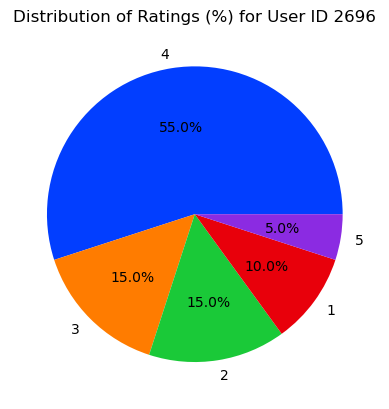

In [101]:
# Plot a pie char with perecentage
rating_counts = UserID_2696['Rating'].value_counts().to_dict()
labels = list(rating_counts.keys())
counts = list(rating_counts.values())
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of Ratings (%) for User ID 2696")
plt.show()

#### There are a total of 20 movies reviewed by UserID = 2696 and Lone star is the only movie has rating of 5.
#### Most of the ratings are 4 and hold the highest percentage of 55%.

### Feature Engineering:

#### 1. Find out all the unique genres

In [102]:
# Spilt the genre data and use .to.list() to turn it into a list
# Use stack to convert 2D list to 1D and use unique to get unique values of genres
unique_genre = pd.DataFrame(movie_df.Genres.str.split('|').tolist()).stack().unique()
print(unique_genre)

['Animation' "Children's" 'Comedy' 'Adventure' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Sci-Fi' 'Documentary' 'War'
 'Musical' 'Mystery' 'Film-Noir' 'Western']


In [103]:
print("Number of unique genres: ", len(unique_genre))

Number of unique genres:  18


#### 2. Create a separate column for each genre category with a one-hot encoding (1 and 0) whether or not the movie belongs to that genre. 

In [104]:
Final_Data.head()

,UserID,MovieID,Rating,Timestamp,Year,Month,Gender,Age,Occupation,Zip-code,Title,Genres
0,6040,858,4,2000-04-26 07:05:32,2000,4,M,25,6,11106,"Godfather, The (1972)",Action|Crime|Drama
1,6039,858,4,2000-04-26 22:06:13,2000,4,F,45,0,01060,"Godfather, The (1972)",Action|Crime|Drama
2,6037,858,5,2000-04-26 08:31:58,2000,4,F,45,1,76006,"Godfather, The (1972)",Action|Crime|Drama
3,6033,858,4,2000-04-26 09:50:38,2000,4,M,50,13,78232,"Godfather, The (1972)",Action|Crime|Drama
4,6028,858,4,2000-04-26 12:29:53,2000,4,M,18,4,94133,"Godfather, The (1972)",Action|Crime|Drama


In [105]:
new_genre = pd.concat([Final_Data, Final_Data.Genres.str.get_dummies()], axis=1)

In [106]:
# After one-hot encoding on the genres, the number of columns increased to 30.
new_genre.shape

(1000209, 30)

In [107]:
# Let's take a quick look at all the columns
new_genre.columns

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Year', 'Month', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'Title', 'Genres', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [108]:
new_genre.head()

,UserID,MovieID,Rating,Timestamp,Year,Month,Gender,Age,Occupation,Zip-code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,6040,858,4,2000-04-26 07:05:32,2000,4,M,25,6,11106,...,0,0,0,0,0,0,0,0,0,0
1,6039,858,4,2000-04-26 22:06:13,2000,4,F,45,0,01060,...,0,0,0,0,0,0,0,0,0,0
2,6037,858,5,2000-04-26 08:31:58,2000,4,F,45,1,76006,...,0,0,0,0,0,0,0,0,0,0
3,6033,858,4,2000-04-26 09:50:38,2000,4,M,50,13,78232,...,0,0,0,0,0,0,0,0,0,0
4,6028,858,4,2000-04-26 12:29:53,2000,4,M,18,4,94133,...,0,0,0,0,0,0,0,0,0,0


In [109]:
new_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 30 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   UserID       1000209 non-null  int64         
 1   MovieID      1000209 non-null  int64         
 2   Rating       1000209 non-null  int64         
 3   Timestamp    1000209 non-null  datetime64[ns]
 4   Year         1000209 non-null  int32         
 5   Month        1000209 non-null  int32         
 6   Gender       1000209 non-null  object        
 7   Age          1000209 non-null  int64         
 8   Occupation   1000209 non-null  int64         
 9   Zip-code     1000209 non-null  object        
 10  Title        1000209 non-null  object        
 11  Genres       1000209 non-null  object        
 12  Action       1000209 non-null  int64         
 13  Adventure    1000209 non-null  int64         
 14  Animation    1000209 non-null  int64         
 15  Children's   10

#### 3. Determine the features affecting the ratings of any particular movie

In [110]:
# One-hot encoding on gender column
one_hot_gender = new_genre['Gender'].str.get_dummies()

In [111]:
one_hot_gender_new = pd.merge(new_genre, one_hot_gender, how='inner', left_index=True, right_index=True)
one_hot_gender_new.head()

,UserID,MovieID,Rating,Timestamp,Year,Month,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,F,M
0,6040,858,4,2000-04-26 07:05:32,2000,4,M,25,6,11106,...,0,0,0,0,0,0,0,0,0,1
1,6039,858,4,2000-04-26 22:06:13,2000,4,F,45,0,01060,...,0,0,0,0,0,0,0,0,1,0
2,6037,858,5,2000-04-26 08:31:58,2000,4,F,45,1,76006,...,0,0,0,0,0,0,0,0,1,0
3,6033,858,4,2000-04-26 09:50:38,2000,4,M,50,13,78232,...,0,0,0,0,0,0,0,0,0,1
4,6028,858,4,2000-04-26 12:29:53,2000,4,M,18,4,94133,...,0,0,0,0,0,0,0,0,0,1


In [112]:
# Drop below colummns:
# Since both genres and gender already applied one-hot coding, we can drop it.
# We have also obtained year and month from timestamp, hence we can also drop it.
# In business context, both zip-code and title do not have any value, thus we can also drop it.

features = one_hot_gender_new.drop(['Genres', 'Gender', 'Zip-code', 'Title','Timestamp'], axis=1)

In [113]:
# Let's take a quick look at the columns
features.shape

(1000209, 27)

In [114]:
features.head()

,UserID,MovieID,Rating,Year,Month,Age,Occupation,Action,Adventure,Animation,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,F,M
0,6040,858,4,2000,4,25,6,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,6039,858,4,2000,4,45,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,6037,858,5,2000,4,45,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6033,858,4,2000,4,50,13,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,6028,858,4,2000,4,18,4,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [115]:
# Determine x and y
x = features.drop(['Rating'], axis=1)
y = features['Rating']

In [116]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x, y)

feature_scores = pd.DataFrame({'Features': x.columns, 'Score': fit.scores_})
top_features = feature_scores.nlargest(10, 'Score')

print(top_features)

      Features         Score
1      MovieID  3.341344e+06
0       UserID  1.720993e+05
4          Age  1.865494e+04
13       Drama  9.705111e+03
16      Horror  9.192491e+03
22         War  6.405101e+03
15   Film-Noir  3.826022e+03
20      Sci-Fi  1.845628e+03
6       Action  1.734519e+03
9   Children's  1.596212e+03


In [117]:
# create variable to contain selected features
Selected_features = features[["Children's", 'MovieID', 'UserID', 'Age', 'Drama', 'Horror', 'War', 'Film-Noir', 'Sci-Fi','Action']]
Selected_features.head()

,Children's,MovieID,UserID,Age,Drama,Horror,War,Film-Noir,Sci-Fi,Action
0,0,858,6040,25,1,0,0,0,0,1
1,0,858,6039,45,1,0,0,0,0,1
2,0,858,6037,45,1,0,0,0,0,1
3,0,858,6033,50,1,0,0,0,0,1
4,0,858,6028,18,1,0,0,0,0,1


In [118]:
Selected_features.shape

(1000209, 10)